## Quiz #0801

### "Text Classification with Keras"

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [8]:
import numpy as np
import pandas as pd
import re
import nltk
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
#nltk.download('stopwords')

#### Answer the following question by providing Python code:

1). Read in the movie review data from Cornell CS department. Carry out the EDA. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [16]:
reviews = load_files('txt_sentoken/')
X, y = reviews.data, reviews.target

In [10]:
len(X)

2000

In [11]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

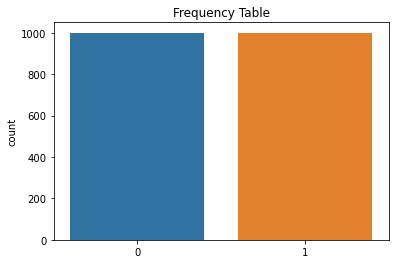

In [12]:
sns.countplot(y).set_title("Frequency Table")
plt.show()

2). Carry out the data preprocessing: <br>
- Cleaning.
- Stopword removal.

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Latitude\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Latitude\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
documents = []
stemmer = WordNetLemmatizer()


for sen in range(0, len(my_docs)):
     # Remove all the special characters
    document = re.sub(r'\W', ' ', str(my_docs[sen]))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [15]:
print(documents[0])

arnold schwarzenegger ha been an icon for action enthusiast since the late 80 but lately his film have been very sloppy and the one liner are getting worse nit hard seeing arnold a mr freeze in batman and robin especially when he say ton of ice joke but hey he got 15 million what it matter to him nonce again arnold ha signed to do another expensive blockbuster that can compare with the like of the terminator series true lie and even eraser nin this so called dark thriller the devil gabriel byrne ha come upon earth to impregnate woman robin tunney which happens every 1000 year and basically destroy the world but apparently god ha chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but it make the wor

3). Carry out label encoding by integers (required form by Keras):

In [19]:
A = {'target': y.tolist(), 'text': documents}
df = pd.DataFrame(A)
df.head()

,target,text
0,0,arnold schwarzenegger ha been an icon for acti...
1,1,good film are hard to find these day ngreat fi...
2,1,quaid star a man who ha taken up the proffesio...
3,0,we could paraphrase michelle pfieffer characte...
4,1,kolya is one of the richest film ve seen in so...


4). Prepare the data for AI: <br>
- Apply the padding.
- Split the data into training and testing.

In [30]:
train_size = 0.8

# split our data into train set (80%) and test set (20%)
train_data, test_data = train_test_split(df, test_size = 1 - train_size, random_state = 0, stratify = df.target)

In [34]:
# length of each set
print("Train data size: ", len(train_data))
print("Test data size: ", len(test_data))

# how many examples of each class there is in each set
print("Train data distr:\n", train_data.target.value_counts())
print("Test data distr:\n", test_data.target.value_counts())

Train data size:  1600
Test data size:  400
Train data distr:
 1    800
0    800
Name: target, dtype: int64
Test data distr:
 1    200
0    200
Name: target, dtype: int64


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
#The above script divides data into 20% test set and 80% training set.

In [25]:
from keras.preprocessing.text import Tokenizer

In [36]:
# create a tokenizer
tokenizer = Tokenizer()
# fit the tokenizer in the train text
tokenizer.fit_on_texts(train_data.text)


In [39]:
from keras.preprocessing.sequence import pad_sequences
# get max length of the train data
max_length = max([len(s.split()) for s in train_data.text])
# pad sequences in x_train data set to the max length
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),maxlen = max_length)
# pad sequences in x_test data set to the max length
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),maxlen = max_length)

In [120]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape:  (1600, 2305)
x_test shape:  (400, 2305)
y_train shape: (1600, 1)
y_test shape: (400, 1)


5). Define the AI model (Embedding + LSTM):

6). Define the optimizer and compile the model:

In [135]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(x_train, y_train, epochs = 100, batch_size = 16, shuffle=True, callbacks=[reduce_lr])

7). Train the model and visualize the summary:

In [140]:
x_train.shape , y_train.shape

((1600, 2305), (1600, 1))

In [159]:
# define model
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(290714, 50, input_length=100))
model.add(Dropout(0.2))
model.add(LSTM(200, dropout = 0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

print(model.summary())

model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 50)           14535700  
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               200800    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 14,749,429
Trainable params: 14,749,429
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
epochs = 15
batch_size = 1024

history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

8). Display the test result (accuracy):

In [ ]:
# evaluate model
score = model.evaluate(x_test, y_test, batch_size = BATCH_SIZE)
print("Test loss:", score[0])
print("Test accuracy:", score[1])